# Project: Investigate a Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> In this project we first wrangle the data set to make it fit for analysis then we analyze data and draw some conclusions on the basis of provided data. For now we only focus on Descriptive Statistics to draw conclusions.
We are going to use Numpy, Pandas, Matplotlib for our data analysis process.
We will analyse data and try to draw some conclusions like the impact of budget on popularity, revenue, or which genre are getting popular over the years and many more...

In [1]:
# import all packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# magic keyword to render plots in notebook itself
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section we have loaded data from source and cleaned it as per requirement and data issues.

### General Properties
> We review general properties of data to complete our data analysis

In [2]:
# Load data from source
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Check for duplicated data

In [5]:
df.duplicated().sum()

1

**Check for null values**

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Correlation among variables

In [7]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


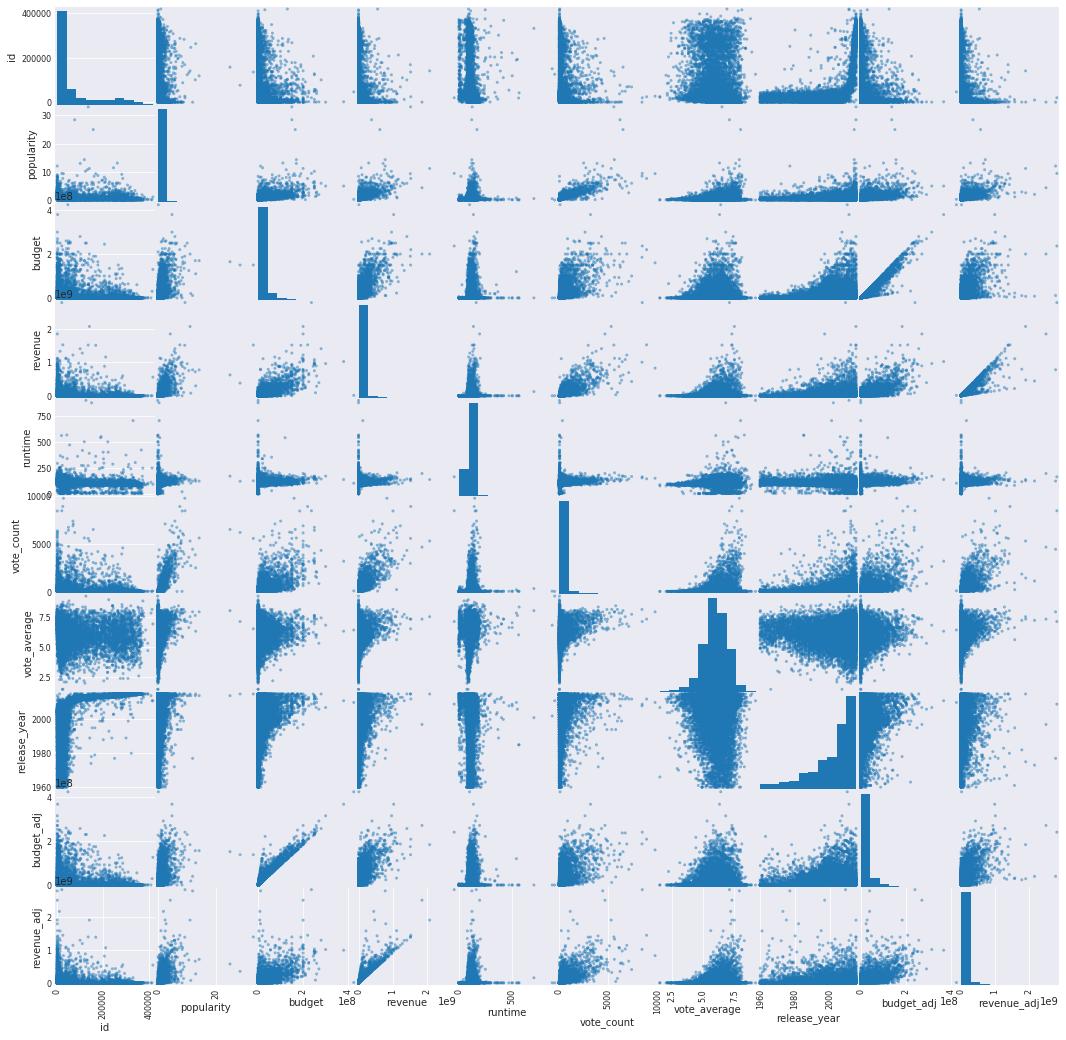

In [8]:
pd.plotting.scatter_matrix(df,figsize=(18,18));

### Data Cleaning 
> In this step we clean null and duplicated data and then fix other data issues like data-types, inconsistent values etc.

**Drop duplicate data**

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(10865, 21)

#### Drop rows that have **genre** column empty, as we need to analyze genre over years

In [11]:
df.dropna(subset=['genres'], inplace=True)

In [12]:
df.shape

(10842, 21)

#### Drop rows that have budget less than 999 as its not possible to make movie in such a low budget

In [13]:
df = df.drop(df[(df.budget_adj<999)].index)

In [14]:
df.shape

(5110, 21)

#### Fix datatype of release_date column from object to datetime

In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].apply(lambda x : x.replace(year = (x.year-100)) if x>datetime.now() else x)

In [16]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Create a week day column from release_date column

In [17]:
df['weekday']=df['release_date'].dt.weekday_name
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,weekday
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Tuesday
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Wednesday


#### Create a profit column by subtracting budget_adj from revenue_adj

In [18]:
df['profit'] = df['revenue_adj']-df['budget_adj']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,weekday,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Tuesday,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Wednesday,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Wednesday,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Tuesday,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Wednesday,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Now We wil statistically analyze the data to draw some useful conclusions

### Research Question 1
Which Genres are most popular year to year?

In [19]:
genre_data = df[['release_year','genres']]
genre = genre_data['genres'].str.split('|').apply(pd.Series)
genre.index=genre_data.release_year
genre.head()

,0,1,2,3,4
release_year,,,,,
2015,Action,Adventure,Science Fiction,Thriller,NaN
2015,Action,Adventure,Science Fiction,Thriller,NaN
2015,Adventure,Science Fiction,Thriller,NaN,NaN
2015,Action,Adventure,Science Fiction,Fantasy,NaN
2015,Action,Crime,Thriller,NaN,NaN


In [20]:
# Change data from columns to rows using pandas stack method
genre_over_years = genre.stack().reset_index('release_year')
genre_over_years.rename(columns={0:'genre'},inplace=True)
genre_over_years['Count']=1
genre_over_years.head()

,release_year,genre,Count
0,2015,Action,1
1,2015,Adventure,1
2,2015,Science Fiction,1
3,2015,Thriller,1
0,2015,Action,1


> Here we just expanded the genre to multiple rows after extracting from list seperated by **|**

In [21]:
df_genre_over_years = genre_over_years.groupby(['release_year','genre']).count()['Count']
df_genre_over_years

release_year  genre          
1960          Action               2
              Adventure            2
              Comedy               3
              Drama                3
              Fantasy              1
              History              1
              Horror               3
              Romance              3
              Science Fiction      2
              Thriller             3
              Western              1
1961          Action               3
              Adventure            2
              Animation            1
              Comedy               4
              Crime                1
              Drama                9
              Family               2
              History              1
              Horror               1
              Music                1
              Romance              3
              War                  1
              Western              1
1962          Action               3
              Adventure            3
        

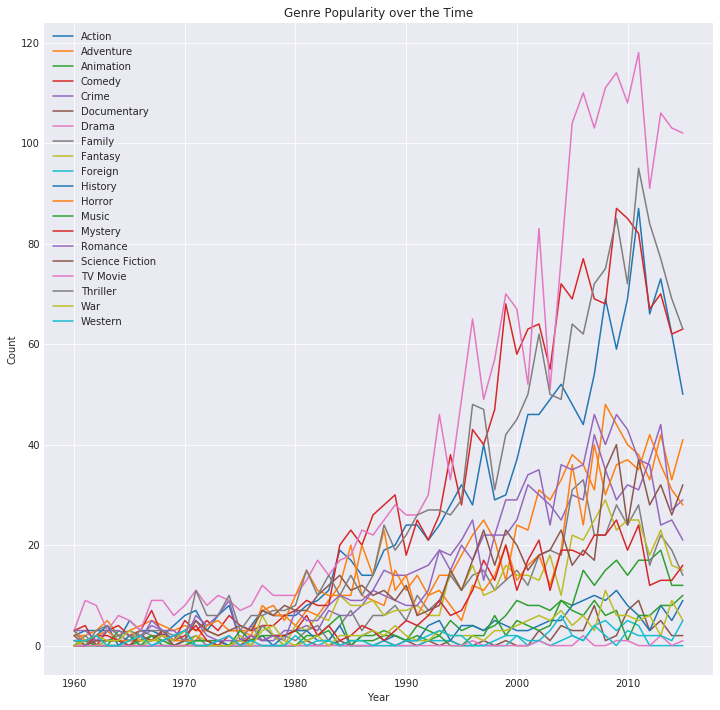

In [22]:
ax = df_genre_over_years.unstack().rename_axis(None,axis=1).fillna(0).plot(figsize=(12,12))
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title('Genre Popularity over the Time');

The above plot shows that number of movies of each genre releasing over the years. This plot helps us to understand which genre is more appreciated by the audience. From the above plot it is visible that Action, Thriller, Drama, Comedy genre are more popular than other genre.

### Research Question 2
Does profit affected by the week day of movie release?

In [23]:
movie_count=df.groupby('weekday').count()['id']/df.shape[0]
movie_count

weekday
Friday       0.417417
Monday       0.051663
Saturday     0.052838
Sunday       0.041292
Thursday     0.192564
Tuesday      0.086693
Wednesday    0.157534
Name: id, dtype: float64

In [24]:
profit=df.groupby('weekday').mean()['profit']
profit /=profit.sum()
profit

weekday
Friday       0.082013
Monday       0.163077
Saturday     0.069714
Sunday       0.132138
Thursday     0.152844
Tuesday      0.183329
Wednesday    0.216886
Name: profit, dtype: float64

> In the above two steps movie_count and profit is normalized to the scale of 0 to 1,
so that both can be easily shown on single plot as count is very less than profit amount

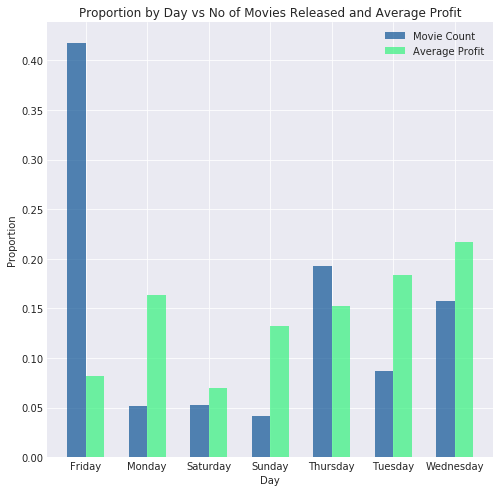

In [25]:
width=0.30
plt.figure(figsize=(8,8))
locations=np.arange(len(movie_count.index))
a=plt.bar(locations, movie_count, width = width, alpha = .7, label='Movie Count', color='#0d5394')
b=plt.bar(locations + width, profit, width = width, alpha=.7, label='Average Profit', color='#35f27e')
plt.ylabel('Proportion')
plt.xlabel('Day')
plt.title('Proportion by Day vs No of Movies Released and Average Profit')
plt.xticks(locations+ (width / 2), movie_count.index)

plt.legend();

The above plot shows the average profit per week day and the number of movies released on each day. This helps us to understand that on which day movie release will generate more profit. From the above plot it is visible that a large proportion of movies are released on Friday but more profit is generated by movies releasing on other days.

### Research Question 3
How budget spend on movies change over time and is there any impact of budget on profit.

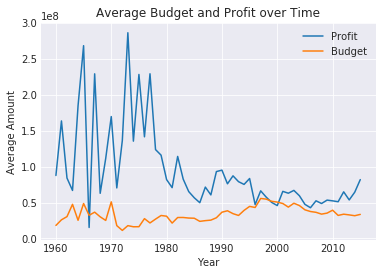

In [26]:
profit_data = df.groupby('release_year').mean()['profit']
budget_data = df.groupby('release_year').mean()['budget_adj']
plt.plot(profit_data, label='Profit');
plt.plot(budget_data, label='Budget');
plt.xlabel('Year')
plt.ylabel('Average Amount')
plt.title('Average Budget and Profit over Time')
plt.legend();

The above plot shows average budget of movies and average profit generated over the time. From the above plot it can be seen that the budget almost remained same but the profit decreased over the time.

In [27]:
# Funtion to create scatter plots
def scatter_plot(x, y, x_label, y_label, title):
    plt.scatter(x ,y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);   

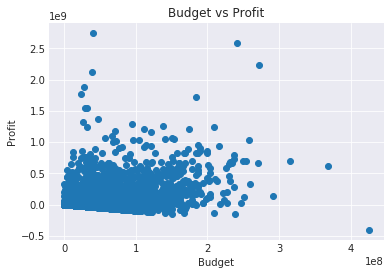

In [28]:
scatter_plot(df.budget_adj, df.profit, 'Budget', 'Profit', 'Budget vs Profit')


The above plot shows correleation between Budget spent on movies and profit generated. From the plot it seems very less correlation between budget and profit. So it may conclude that if the budget on movies is increased then also it is not sure that it will increase the profit.

In [29]:
# Correlation coefficient between Budget and Profit
df.corr().loc['budget_adj','profit']

0.42363867752711404

### Research Question 4
Does popularity has any impact on profit?

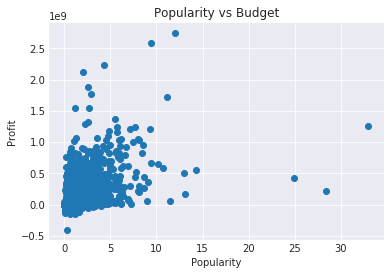

In [30]:
scatter_plot(df.popularity, df.profit, 'Popularity', 'Profit', 'Popularity vs Budget')
#sns.lmplot(x='popularity', y='profit', data=df, ci=None)

The above plot shows correlation between the popularity and budget. From the above plot it is visible that there is not that much correlation between them. So it is difficult to say that a more budget movie is more popular.

In [31]:
# Correleation coefficient between popularity and profit
df.corr().loc['popularity','profit']

0.54318946084816899

### Research Question 5
What kinds of properties are associated with movies that have high revenues?

In [32]:
revenue_median = df['revenue_adj'].median()

> The data set is divided in high and low revenue. As it has outliers so we are using median instead of mean here.

In [33]:
high_revenue = df.query(f'revenue_adj > {revenue_median}')
low_revenue = df.query(f'revenue_adj <= {revenue_median}')

In [34]:
high_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2.555000e+03
mean,34558.064188,1.497935,4.812873e+07,1.577733e+08,112.059100,728.060665,6.275930,2000.311937,5.715875e+07,2.011022e+08,1.439435e+08
std,63478.360227,1.698657,4.626040e+07,1.988330e+08,20.322556,1014.326929,0.761179,11.930797,4.770556e+07,2.413000e+08,2.209300e+08
min,11.000000,0.010335,1.200000e+04,4.300000e+06,26.000000,10.000000,3.400000,1960.000000,1.577503e+04,2.969499e+07,-1.551102e+08
25%,2619.500000,0.635429,1.550000e+07,4.551682e+07,98.000000,149.000000,5.800000,1994.000000,2.299019e+07,6.206345e+07,2.788427e+07
50%,10140.000000,1.062734,3.400000e+07,9.056542e+07,109.000000,357.000000,6.300000,2003.000000,4.271448e+07,1.146583e+08,6.976168e+07
75%,25419.500000,1.761105,6.500000e+07,1.833839e+08,123.000000,850.500000,6.800000,2009.000000,7.854317e+07,2.363153e+08,1.674995e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


In [35]:
low_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2.555000e+03
mean,55750.764775,0.502748,1.406025e+07,4.614147e+06,102.229746,97.546380,5.796477,2002.181996,1.747122e+07,5.552327e+06,-1.191889e+07
std,78887.704795,0.426494,1.788859e+07,7.314311e+06,23.748751,163.003232,0.925470,11.517553,2.161785e+07,8.525600e+06,2.135599e+07
min,5.000000,0.001117,2.000000e+02,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,1.307353e+03,0.000000e+00,-4.139124e+08
25%,10733.000000,0.247338,3.000000e+06,0.000000e+00,91.000000,19.000000,5.200000,1997.000000,3.792410e+06,0.000000e+00,-1.663877e+07
50%,18882.000000,0.401061,8.600000e+06,0.000000e+00,98.000000,42.000000,5.900000,2006.000000,1.016400e+07,0.000000e+00,-6.315531e+06
75%,59251.000000,0.625967,2.000000e+07,7.549530e+06,110.000000,101.500000,6.500000,2011.000000,2.351726e+07,9.474952e+06,-9.253440e+05
max,414419.000000,4.780419,4.250000e+08,3.224824e+07,540.000000,2372.000000,8.400000,2015.000000,4.250000e+08,2.968581e+07,2.770735e+07


### Research Question 6
What kinds of properties are associated with movies that have high popularity?

In [36]:
popularity_median = df['popularity'].median()

> The data set is divided in high and low popularity. As it has outliers so we are using median instead of mean here.

In [37]:
high_popularity = df.query(f'popularity > {popularity_median}')
low_popularity = df.query(f'popularity <= {popularity_median}')

In [38]:
high_popularity.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2.555000e+03
mean,47727.263014,1.650310,4.616507e+07,1.443878e+08,110.813307,747.419569,6.288180,2002.889237,5.317763e+07,1.792128e+08,1.260352e+08
std,77380.065275,1.641093,4.639945e+07,2.038295e+08,22.571889,997.005841,0.782593,11.009067,4.855414e+07,2.483649e+08,2.249898e+08
min,5.000000,0.630566,7.000000e+03,0.000000e+00,4.000000,10.000000,3.300000,1960.000000,8.081118e+03,0.000000e+00,-1.551102e+08
25%,2657.500000,0.856102,1.500000e+07,2.492224e+07,96.000000,185.000000,5.800000,1998.000000,1.839999e+07,3.030175e+07,1.921432e+06
50%,10440.000000,1.164724,3.000000e+07,7.751630e+07,107.000000,389.000000,6.300000,2006.000000,3.744133e+07,9.512343e+07,5.366952e+07
75%,52485.500000,1.834523,6.050000e+07,1.777132e+08,121.000000,852.500000,6.900000,2011.000000,7.361680e+07,2.241698e+08,1.546130e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


In [39]:
low_popularity.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2555.000000,2555.000000,2555.000000,2555.000000,2.555000e+03,2.555000e+03,2.555000e+03
mean,42581.565949,0.350373,1.602391e+07,1.799965e+07,103.475538,78.187476,5.784227,1999.604697,2.145234e+07,2.744170e+07,5.989365e+06
std,66906.700757,0.155854,2.081471e+07,4.224839e+07,22.111407,190.360209,0.900768,12.253629,2.588555e+07,6.495281e+07,5.990573e+07
min,26.000000,0.001117,2.000000e+02,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,1.307353e+03,0.000000e+00,-4.139124e+08
25%,10386.500000,0.225192,3.000000e+06,0.000000e+00,91.000000,19.000000,5.200000,1993.000000,4.573802e+06,0.000000e+00,-1.232118e+07
50%,15037.000000,0.352237,1.000000e+07,1.000000e+06,99.000000,38.000000,5.800000,2003.000000,1.260217e+07,1.083683e+06,-3.253646e+06
75%,37808.500000,0.476753,2.000000e+07,2.007994e+07,112.000000,82.000000,6.400000,2009.000000,2.889101e+07,2.914946e+07,6.332671e+06
max,414419.000000,0.630068,4.250000e+08,7.886798e+08,352.000000,4368.000000,8.400000,2015.000000,4.250000e+08,8.530813e+08,8.404891e+08


<a id='conclusions'></a>
## Conclusions
**As per analysis we can say that**
1. The average budget spent on movies remains almost same over time but the revenue decreases over time.
2. The popular genre over the time are Action, Thriller, Drama, Comedy as more movies are releasing for these genre over the time.
3. More movies are releasing on Fridays but movies releasing on other days generating more profit, so if one wants to make profit then they can think to release movies on other days.
4. Analysing the correlation between budget and profit it is very difficult to say that if more budget movie will generate more profit, as the correlation constant is just 0.42.

So our results are not conculisive statements but as per data available we can see that many movies are releasing on friday but they are not generating more profit. And we can see that profit is decreasing over time so one can think to make movies in other genre than Action, Thriller, Drama, Comedy, may be it will increase the profit.

**Limitations :** All drawn conclusions are tentaive and may change in controlled experiment as there can be other extraneous factors/lurking variables like vfx, actor popularity, region, language etc. Moreover we are not sure that the data is correct or up to date, as in many rows budget is very low and its not possible to make movies in that low budget.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0